<a href="https://colab.research.google.com/github/Jarvis2001/Projects/blob/main/BDA_House_Price_Prediction_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing the Boston House Price Dataset provided by Sklearn

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

In [ ]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

Expansion:-

CRIM:-     per capita crime rate by town

ZN:-       proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS:-    proportion of non-retail business acres per town

 CHAS:-     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX:-      nitric oxides concentration (parts per 10 million)


 RM:-       average number of rooms per dwelling


 AGE:-      proportion of owner-occupied units built prior to 1940


 DIS:-      weighted distances to five Boston employment centres


 RAD:-      index of accessibility to radial highways


 TAX:-      full-value property-tax rate per $10,000


 PTRATIO:-  pupil-teacher ratio by town


 B:-        1000(Bk - 0.63)^2 where Bk is the 
 proportion of blacks by town


 LSTAT:-    % lower status of the population


 MEDV/price:-     Median value of owner-occupied homes in $1000's


In [ ]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [ ]:
correlation = house_price_dataframe.corr()

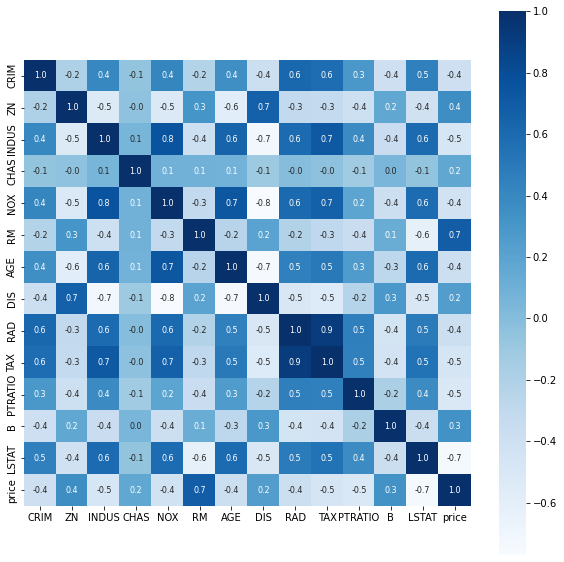

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Splitting the data into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

[21:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9733349094832763
Mean Absolute Error :  1.145314053261634


Visualizing the actual Prices and predicted prices

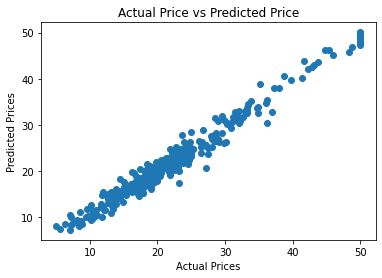

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data 

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[19.862686  20.875359  33.17797   27.382437   8.670393  12.749035
 24.892832  28.360075  24.255108  21.072632  26.47432   23.733467
 19.937876  20.904943  11.981489  21.96157   18.912077  11.756731
  7.6664963 15.348703  22.421118  20.452726  35.121113  18.995922
 14.649773  19.7423    46.987373  31.679413  33.486717  19.149603
 16.978365  19.986921  29.671926  25.908306  12.054155  19.783747
 11.48538   20.736174  21.28781   22.159164  24.212786  14.06105
 31.836473   8.498605  19.9131    15.15852   34.853638  16.41293
 32.33093   11.683373  29.010166  27.483522   7.4060163 36.29048
 26.685335  19.16574   18.62919   18.594267  15.957146  20.692377
 18.621147  20.87898   18.639454  31.751453  34.53461   24.462927
 48.532074  25.695988  11.561405  22.441519  13.844913   8.819357
 18.711916  17.386942  25.362583  24.995708  21.686417  21.840801
 20.210482  23.037663  34.230244  17.989033  19.622482  29.318424
 47.41502   34.988304  18.88605   23.692265  29.01938   19.878334
 20.244999  1

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9115937697657654
Mean Absolute Error :  1.9922956859364223


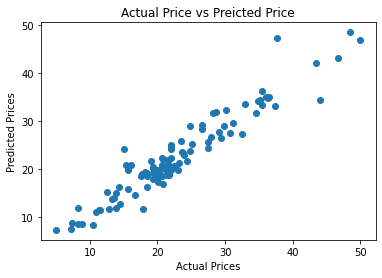

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Adaboost


Training

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
regr.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [ ]:
prediction = regr.predict(X_train)

In [ ]:
print(prediction)


[25.53170732 21.41345029 22.57017544 33.81308411 18.18731707 15.00809249
 21.28580645 16.35333333 15.96666667 21.28580645 17.83888889 11.61875
 29.64303797 50.         33.15849057 18.52452107 22.98163265 21.20350877
 29.832      20.05373832 27.18930233 12.39642857 44.35       21.44363636
 21.28580645 19.08820961 21.28580645 28.89826087 20.29066667 30.84541284
 22.58807339 12.69166667 18.94233871 17.77202381 13.55714286 11.97
 14.53776224 22.1583815  17.30697674 16.75857988 26.11162791 28.46034483
 17.63505155 17.77202381 16.37540107 16.75857988 26.11162791 18.80521327
 47.70333333 18.28235294 22.57017544 32.29371069 17.77202381 25.07355769
 18.94233871 22.03252033 19.08820961 32.43508772 31.86078431 32.0064
 21.74086957 47.38947368 14.44341085 11.61875    22.1583815  13.20421053
 24.39327731 18.52452107 22.24468085 47.38947368 39.36034483 32.42846715
 23.90515464 32.35       27.38947368 47.51866667 17.00652174 18.34321608
 22.42       23.90515464 45.28058252 23.48064516 26.16980198 19.

In [ ]:
# R squared error
score_2 = metrics.r2_score(Y_train, prediction)

# Mean Absolute Error
score_1 = metrics.mean_absolute_error(Y_train, prediction)

print("R squared error : ", score_2)
print('Mean Absolute Error : ', score_1)

R squared error :  0.9123192541502135
Mean Absolute Error :  2.2061031961263464


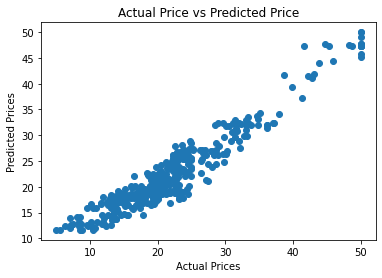

In [ ]:
plt.scatter(Y_train, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Test

In [ ]:
prediction = regr.predict(X_test)

In [ ]:
print(prediction)

[22.04       18.80521327 33.         29.43055556 12.64583333 14.24615385
 25.63133333 27.18930233 18.54       18.18731707 26.77424242 24.40298507
 21.41345029 18.94233871 13.55714286 25.57980296 18.94233871 11.97
 12.69166667 16.9027027  26.16980198 19.87254902 32.04915254 18.28235294
 16.37540107 18.94233871 42.51441441 31.86078431 32.4025641  21.28580645
 16.75857988 21.41345029 30.66486486 28.02984293 14.35789474 16.62849162
 11.97       19.08820961 21.44363636 22.8862069  24.40298507 16.75857988
 28.46034483 11.97       22.57017544 16.37540107 34.06818182 16.75857988
 33.59162562 15.474      29.21625    24.9        11.67567568 33.15849057
 17.63505155 21.28580645 20.4625     18.54       18.28235294 18.80521327
 18.94233871 24.26312057 18.57246377 30.14867257 31.92401961 23.90515464
 47.51866667 25.63133333 12.54545455 23.27571429 16.75857988 12.39642857
 18.80521327 18.18731707 25.07355769 26.16980198 18.94233871 21.20350877
 20.77118644 25.57980296 32.84766355 19.60769231 20.05373

In [ ]:
# R squared error
score_2 = metrics.r2_score(Y_test, prediction)

# Mean Absolute Error
score_1 = metrics.mean_absolute_error(Y_test, prediction)

print("R squared error : ", score_2)
print('Mean Absolute Error : ', score_1)

R squared error :  0.8690957856585515
Mean Absolute Error :  2.617457186637304


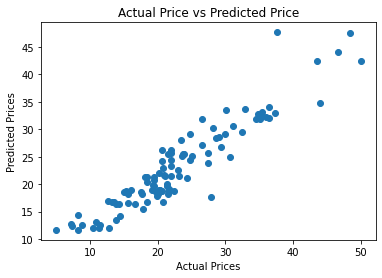

In [ ]:
plt.scatter(Y_test, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Random Forest Regressor

Training

In [ ]:
regr1 = RandomForestRegressor(max_depth=2, random_state=0)


In [ ]:
regr1.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred_y = regr1.predict(X_train)


In [ ]:
print(pred_y)

[24.87756021 24.60319578 21.79413385 33.15974288 16.07986765 14.98644777
 20.28419526 15.61595313 16.77759018 21.51433256 15.12041425 14.44767283
 26.46376351 24.40987091 29.96326286 21.62817968 24.60319578 21.94687571
 30.36971459 21.79413385 25.13513541 14.44767283 43.43470007 21.94687571
 15.93403285 21.79413385 21.94687571 26.9564986  21.94687571 30.76437119
 21.89052021 14.44767283 21.62817968 15.85917242 14.44767283 14.44767283
 14.66836806 22.20434918 15.85917242 15.13095365 24.87756021 30.03102466
 15.0513998  15.87955677 16.00908881 15.85917242 24.96097565 15.85917242
 44.08042081 18.18908978 21.94687571 29.22282424 16.23678759 24.96097565
 21.54431508 24.42254575 21.54431508 30.4538751  26.7961611  30.68463299
 21.79413385 39.86419537 15.26129142 14.44767283 24.60319578 14.47275978
 23.40232395 15.87767735 21.94687571 44.34232652 39.79369537 30.21726382
 24.42254575 32.06927802 25.13513541 44.58584576 15.06769237 18.69368165
 24.67996721 24.60319578 28.01058233 24.42254575 24

In [ ]:
# R squared error
score2 = metrics.r2_score(Y_train, pred_y)

# Mean Absolute Error
score1 = metrics.mean_absolute_error(Y_train, pred_y)

print("R squared error : ", score2)
print('Mean Absolute Error : ', score1)

R squared error :  0.7598350693991891
Mean Absolute Error :  3.1140940692543806


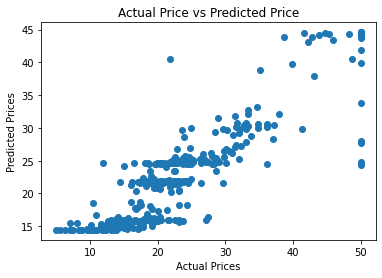

In [ ]:
plt.scatter(Y_train, pred_y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Test

In [ ]:
pred_y = regr1.predict(X_test)

In [ ]:
print(pred_y)

[21.39861495 21.19625284 32.9685843  25.13513541 14.44767283 15.54109271
 23.97556339 27.88080428 20.8737999  20.47667542 25.32247061 24.42254575
 24.67996721 21.79413385 14.44767283 24.42254575 15.85917242 14.44767283
 14.44767283 14.93009227 24.87756021 21.54431508 29.72289562 17.90928849
 15.42316899 21.79413385 39.55163284 30.11213939 31.59145976 24.67996721
 19.94285811 24.67996721 26.16468263 26.10560966 14.52253325 15.48198665
 14.44767283 21.34837839 21.94687571 21.94687571 24.42254575 15.85917242
 30.36971459 14.44767283 21.67841624 15.06593818 33.08925738 15.41638378
 26.27462109 14.72747411 27.45363728 24.41840543 14.44767283 29.43042144
 20.38263425 21.79413385 21.94687571 16.47743778 16.14481969 16.20751939
 16.20751939 25.13513541 16.20751939 26.35078672 26.80941941 24.64003942
 44.08042081 24.03894121 14.44767283 24.60319578 15.85917242 14.44767283
 24.42254575 17.22119861 24.29273873 25.44179954 21.79413385 21.79413385
 21.94687571 23.67997473 32.88746957 16.20751939 20

In [ ]:
# R squared error
score2 = metrics.r2_score(Y_test, pred_y)

# Mean Absolute Error
score1 = metrics.mean_absolute_error(Y_test, pred_y)

print("R squared error : ", score2)
print('Mean Absolute Error : ', score1)

R squared error :  0.7929256383064021
Mean Absolute Error :  3.4179977705657776


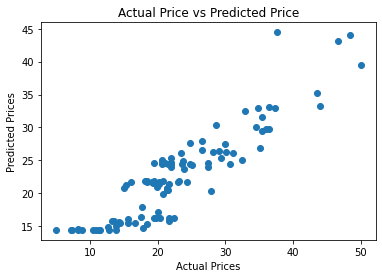

In [ ]:
plt.scatter(Y_test, pred_y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

score_1 for XGBoost

score_2 for Adaboost

score2 for Random Forrest Regerssor

Training Bar Graph Comparision for R squared Error

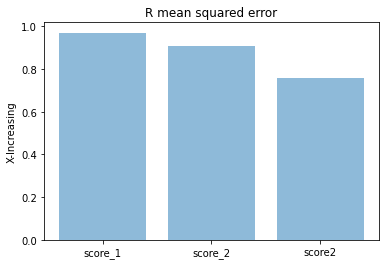

In [ ]:
objects =  ('score_1', 'score_2', 'score2')
y_pos1 = np.arange(len(objects))
performance = [0.97,0.91,0.76]

plt.bar(y_pos1, performance, align="center", alpha = 0.5)
plt.xticks(y_pos1, objects)
plt.ylabel("X-Increasing")
plt.title("R mean squared error")

plt.show()

Test Bar Graph Comparision for R squared Error


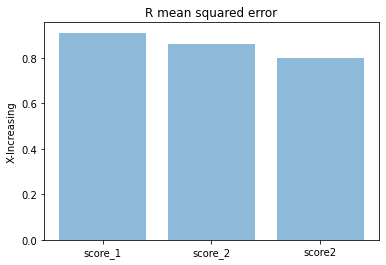

In [ ]:
objects =  ('score_1', 'score_2', 'score2')
y_pos1 = np.arange(len(objects))
performance = [0.91,0.86,0.80]

plt.bar(y_pos1, performance, align="center", alpha = 0.5)
plt.xticks(y_pos1, objects)
plt.ylabel("X-Increasing")
plt.title("R mean squared error")

plt.show()